In [1]:
import random
import string
import abc
from datetime import datetime
from models import *
from functions import *


f:\Python Projects\Parcial 2 ADA\flask-app\app


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

'nxfswclzsn'

In [3]:
import pandas as pd

In [4]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [5]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [6]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [7]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000000000000,9999999999999999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [9]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [10]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [11]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [12]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [13]:
%%time
ids = []
product_ids = []
clientes = generate_clients(30)
products = []
# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

<class 'property'>
Productos generados: 72
Clientes generados: 30
Wall time: 4 ms


In [14]:
products[0].owner

'5-628-340'

## Generar transacciones

In [15]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []

for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 2036
Media de transacción por cliente: 28.27777777777778
Wall time: 85.9 ms


## Generar tablas

In [16]:
df_loans =[]
df_deposits = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)


In [17]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,5-628-340,ckyeexbqzg hmqgooabyvodtxw
1,7-736-777,jskgkneuaz sufgnygwyuexgoc
2,7-196-92,bykzhketti xcdeloieuzrsvkz


In [18]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base
0,3192208,11,0.0,5-628-340,Loan,33,360
1,8287873,11,0.0,7-196-92,Loan,9,365
2,5119058,14,0.0,7-196-92,Loan,112,360


In [19]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,8690083,1,0.0,5-628-340,SavingAccount
1,8159004,2,0.0,5-628-340,FixedTermDeposit
2,5186587,1,0.0,5-628-340,FixedTermDeposit


In [20]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions

,id,nature,accounting_date,amount,product,mvt
0,3851574,Cr,2010-09-14,8.079146e+08,8690083,8.079146e+08
1,4976437,Cr,2012-12-20,5.794695e+08,8690083,5.794695e+08
2,9913947,Cr,2012-01-18,1.964570e+08,8690083,1.964570e+08
3,2938703,Cr,2011-10-18,4.590003e+08,8690083,4.590003e+08
4,8671870,Dr,2011-08-15,5.852826e+07,8690083,-5.852826e+07
...,...,...,...,...,...,...
2031,3979404,Cr,2019-05-30,6.922998e+08,8963729,6.922998e+08
2032,6131464,Cr,2013-12-04,2.803535e+07,8963729,2.803535e+07
2033,1507351,Cr,2013-07-08,6.635731e+08,8963729,6.635731e+08
2034,934467,Cr,2012-05-08,2.352965e+08,8963729,2.352965e+08


In [21]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

,id,interest_rate,balance,owner,type
0,8690083,1,3.726632e+10,5-628-340,SavingAccount
1,8159004,2,1.826228e+10,5-628-340,FixedTermDeposit
2,5186587,1,3.433223e+10,5-628-340,FixedTermDeposit
3,1905485,2,3.441971e+10,7-736-777,SavingAccount
4,5808928,2,1.180899e+10,7-736-777,FixedTermDeposit
5,5232436,1,2.717849e+10,7-196-92,SavingAccount
6,3507374,2,3.079746e+10,10-185-216,SavingAccount
7,9383126,1,3.277887e+10,2-316-204,SavingAccount
8,9601476,2,2.805159e+09,1-559-449,SavingAccount
9,5339781,1,2.708561e+10,1-559-449,FixedTermDeposit


## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [22]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [23]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 8690083
Found 40 transactions from 2010-06-06 00:00:00 to 2020-11-23 00:00:00
         id nature accounting_date        amount  product           mvt
0   9635751     Cr      2010-06-06  7.173894e+08  8690083  7.173894e+08
1   3851574     Cr      2010-09-14  8.079146e+08  8690083  8.079146e+08
2   8299042     Cr      2010-09-26  4.875459e+08  8690083  4.875459e+08
3    306372     Cr      2010-12-31  6.745974e+08  8690083  6.745974e+08
4   8671870     Dr      2011-08-15  5.852826e+07  8690083 -5.852826e+07
5   3560091     Cr      2011-09-24  2.881299e+08  8690083  2.881299e+08
6   2938703     Cr      2011-10-18  4.590003e+08  8690083  4.590003e+08
7   9913947     Cr      2012-01-18  1.964570e+08  8690083  1.964570e+08
8   7885814     Cr      2012-06-23  1.780475e+08  8690083  1.780475e+08
9   2850390     Cr      2012-07-12  8.153563e+08  8690083  8.153563e+08
10  9015888     Cr      2012-11-06  6.447659e+08  8690083  6.447659e+08
11  4976437     Cr  

#### Mostrar un gráfico con el movimiento de su producto

In [24]:
import matplotlib.pyplot as plt

In [25]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         9635751385157482990423063728671870356009129387...
nature     CrCrCrCrDrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCr...
amount                                           1.99375e+10
product    8690083869008386900838690083869008386900838690...
mvt                                              -1.8367e+10
dtype: object

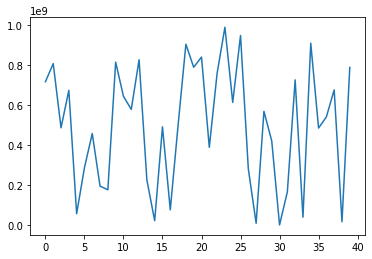

In [26]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [27]:
Transfer.Execute(to=df_transactions.iloc[0]['product'], From=df_transactions.iloc[-1]['product'], amount= 4)



Executing Bank Transfer
ERROR


In [28]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 8690083
Found 40 transactions from 2010-06-06 00:00:00 to 2020-11-23 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,9635751,Cr,2010-06-06,7.173894e+08,8690083,7.173894e+08
1,3851574,Cr,2010-09-14,8.079146e+08,8690083,8.079146e+08
2,8299042,Cr,2010-09-26,4.875459e+08,8690083,4.875459e+08
3,306372,Cr,2010-12-31,6.745974e+08,8690083,6.745974e+08
4,8671870,Dr,2011-08-15,5.852826e+07,8690083,-5.852826e+07
5,3560091,Cr,2011-09-24,2.881299e+08,8690083,2.881299e+08
6,2938703,Cr,2011-10-18,4.590003e+08,8690083,4.590003e+08
7,9913947,Cr,2012-01-18,1.964570e+08,8690083,1.964570e+08
8,7885814,Cr,2012-06-23,1.780475e+08,8690083,1.780475e+08
9,2850390,Cr,2012-07-12,8.153563e+08,8690083,8.153563e+08


### Generar tablas

In [29]:
df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")

## Pruebas

In [30]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")
print(loans)
dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']

client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))
client_products

Unnamed: 0       id  interest_rate  balance       owner  type  length  \
0            0  3192208             11      0.0   5-628-340  Loan      33   
1            1  8287873             11      0.0    7-196-92  Loan       9   
2            2  5119058             14      0.0    7-196-92  Loan     112   
3            3  5467760             11      0.0  10-185-216  Loan      92   
4            4  5565815              8      0.0   2-316-204  Loan      29   
5            5  5410701             12      0.0    5-801-32  Loan     118   
6            6  8193254              7      0.0   1-559-449  Loan      58   
7            7  2630065             16      0.0   7-220-749  Loan      21   
8            8  7399784             15      0.0   6-822-364  Loan      43   
9            9  1436132              5      0.0   6-326-196  Loan     108   
10          10  3150701              4      0.0   6-655-617  Loan      70   
11          11  1630633             11      0.0   5-161-162  Loan     106   
12 

[]

In [31]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [32]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

f:\Python Projects\Parcial 2 ADA\flask-app\app


In [33]:
Product.getProductBalance(id=3598345)

IndexError: single positional indexer is out-of-bounds